In [21]:
from QAOA import QAOArunner
from MaxCutProblem import MaxCutProblem
import params
from rustworkx.visualization import mpl_draw as draw_graph
from load_data import load_graph_from_csv

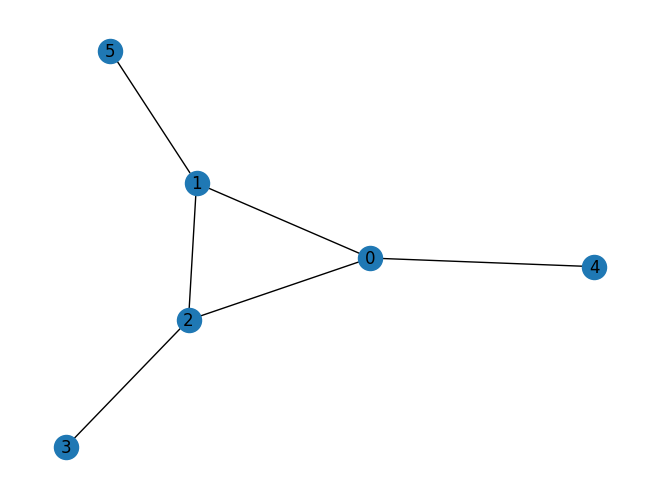

In [22]:
problem = MaxCutProblem()
graph = problem.get_graph(6, create_random=True,random_weights=False)
#graph = load_graph_from_csv('data/11_nodes_links_scand.csv')
draw_graph(graph, with_labels=True)

In [6]:
import warnings

quantum = QAOArunner(graph=graph, 
                     simulation=True,
                     param_initialization= 'gaussian',
                     qaoa_variant='vanilla', 
                     optimizer='COBYLA',
                     warm_start=False,
                     restrictions = True,
                     test=True
                     )

quantum.build_circuit()

quantum.run()
print(quantum.solution)
#quantum.draw_circuit()
#TODO: account for random weigts?

Cost hamiltonian SparsePauliOp(['IIIZII', 'IIIIIZ', 'IZIIII', 'IIIIZI', 'ZIIIII', 'IIZIII', 'IIIIZZ', 'IIIZIZ', 'IIIZZI', 'IZIIZI', 'IZIZII', 'ZIIZII', 'IZZIII', 'ZIZIII', 'ZZIIII'],
              coeffs=[-8.5+0.j, -8.5+0.j, -8.5+0.j, -8.5+0.j, -8.5+0.j, -8.5+0.j,  8.5+0.j,
  9. +0.j,  8.5+0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j,  8.5+0.j,  8.5+0.j,
  8.5+0.j])
Parameters:  ParameterView([ParameterVectorElement(β[0]), ParameterVectorElement(β[1]), ParameterVectorElement(γ[0]), ParameterVectorElement(γ[1])])
Ansatz type: <class 'qiskit.circuit.library.n_local.qaoa_ansatz.QAOAAnsatz'>
Candidate circuit type: <class 'qiskit.circuit.quantumcircuit.QuantumCircuit'>
 message: Optimization terminated successfully.
 success: True
  status: 1
     fun: -5.307692307692307
       x: [ 4.506e-01  5.817e+00  1.926e+00  2.815e+00]
    nfev: 28
   maxcv: 0.0
{38: 487, 20: 388, 45: 89, 58: 222, 25: 53, 44: 271, 17: 276, 57: 337, 30: 113, 56: 361, 7: 46, 32: 69, 53: 155, 49: 85, 0: 201, 52: 89, 50: 165, 18: 

In [23]:
import itertools

iterables = [params.supported_qaoa_variants, params.supported_param_inits]

settings = []
for t in itertools.product(*iterables):
    settings.append(t)
for params in settings:
    print('Params:', params)
    qaoa = QAOArunner(graph, simulation=True, param_initialization=params[1],qaoa_variant=params[0])
    qaoa.build_circuit()
    qaoa.run()

Params: ('vanilla', 'uniform')
You are running on the local simulator:  fake_brisbane
You are running on the local simulator:  fake_brisbane
Cost hamiltonian SparsePauliOp(['IIIIZZ', 'IIIZIZ', 'IZIIIZ', 'IIIZZI', 'ZIIIZI', 'IIZZII'],
              coeffs=[0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j])
Parameters:  ParameterView([ParameterVectorElement(β[0]), ParameterVectorElement(β[1]), ParameterVectorElement(γ[0]), ParameterVectorElement(γ[1])])
Ansatz type: <class 'qiskit.circuit.library.n_local.qaoa_ansatz.QAOAAnsatz'>
Candidate circuit type: <class 'qiskit.circuit.quantumcircuit.QuantumCircuit'>
 message: Optimization terminated successfully.
 success: True
  status: 1
     fun: -1.5074925074925076
       x: [ 1.200e+00  2.681e-01  2.414e+00  1.977e+00]
    nfev: 27
   maxcv: 0.0
{48: 45, 26: 1131, 30: 100, 11: 1150, 37: 1135, 15: 44, 20: 115, 52: 1145, 58: 155, 9: 120, 22: 1063, 34: 11, 43: 102, 33: 96, 56: 89, 39: 39, 3: 116, 27: 100, 41: 1138, 7: 92, 6: 151, 57: 141, 47

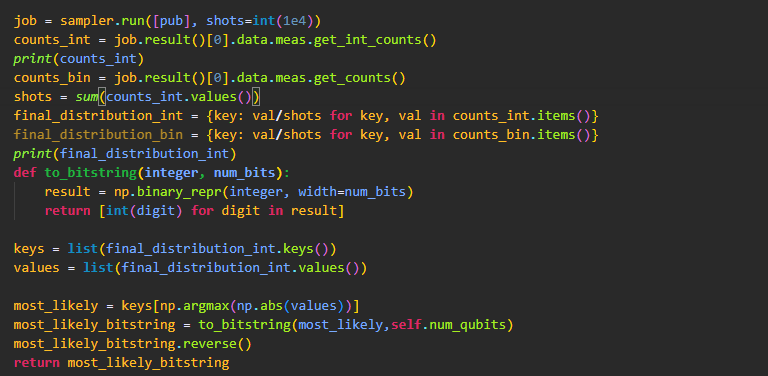

In [ ]:
#the data given here is the "job" from the picture above
data = qaoa.get_data_structures()


In [8]:
from solver import Solver


solver = Solver(graph, restrictions=True)
quantum.compare_solutions(solver.solve())

Result quantum [0, 1, 0, 1, 0, 1] Objective value:  2
Result input (classical) [0, 0, 1.0, 1.0, 0, 0] Objective Value:  3.0
Same solution False
Same objective function value:  False


In [9]:
quantum.get_prob_distribution()

{46: 259, 33: 142, 8: 282, 42: 601, 38: 434, 13: 323, 63: 97, 1: 194, 55: 24, 24: 128, 49: 82, 4: 190, 54: 123, 23: 41, 9: 101, 12: 194, 44: 238, 29: 121, 17: 315, 56: 351, 18: 346, 57: 317, 16: 177, 20: 376, 37: 200, 60: 236, 45: 81, 59: 135, 32: 52, 30: 122, 19: 78, 41: 125, 6: 291, 2: 116, 11: 32, 22: 196, 25: 61, 58: 263, 61: 148, 53: 186, 36: 49, 47: 106, 10: 139, 7: 45, 3: 57, 26: 180, 34: 184, 40: 145, 27: 62, 5: 26, 52: 91, 51: 67, 0: 210, 43: 89, 50: 153, 35: 174, 14: 120, 21: 45, 15: 96, 28: 60, 62: 61, 31: 8, 39: 22, 48: 33}
{46: 0.0259, 33: 0.0142, 8: 0.0282, 42: 0.0601, 38: 0.0434, 13: 0.0323, 63: 0.0097, 1: 0.0194, 55: 0.0024, 24: 0.0128, 49: 0.0082, 4: 0.019, 54: 0.0123, 23: 0.0041, 9: 0.0101, 12: 0.0194, 44: 0.0238, 29: 0.0121, 17: 0.0315, 56: 0.0351, 18: 0.0346, 57: 0.0317, 16: 0.0177, 20: 0.0376, 37: 0.02, 60: 0.0236, 45: 0.0081, 59: 0.0135, 32: 0.0052, 30: 0.0122, 19: 0.0078, 41: 0.0125, 6: 0.0291, 2: 0.0116, 11: 0.0032, 22: 0.0196, 25: 0.0061, 58: 0.0263, 61: 0.0148

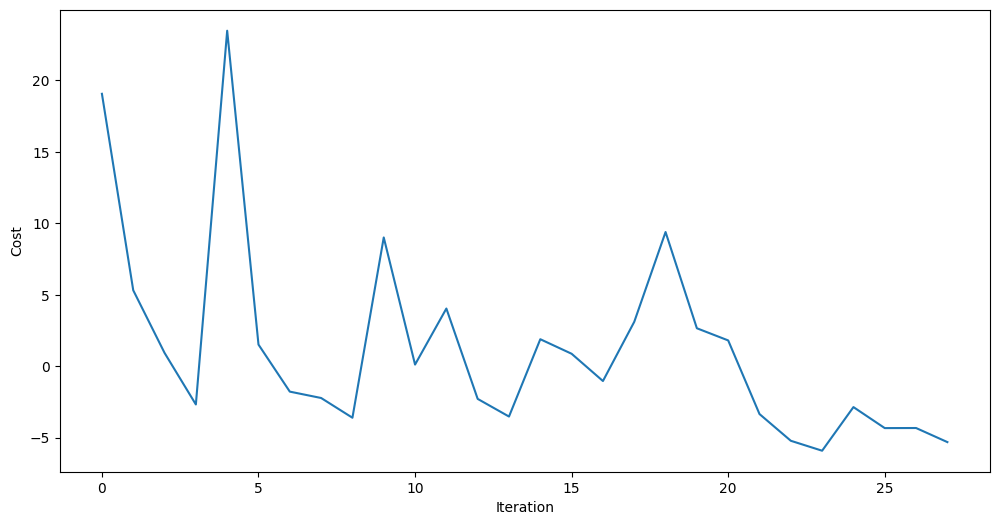

In [10]:
quantum.draw_objective_value()

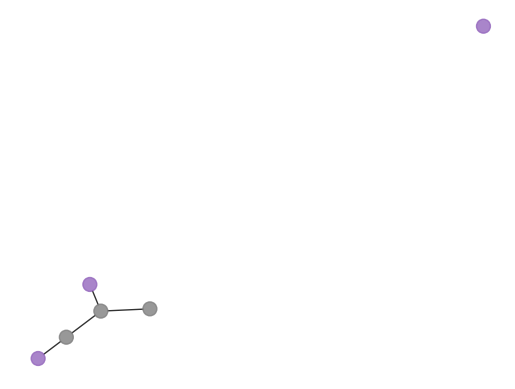

In [11]:
quantum.plot_result()

In [12]:
import csv

import numpy as np
import rustworkx as rx
from rustworkx import is_connected
from rustworkx.visualization import mpl_draw as draw_graph
import pandas as pd
import geopandas as gpd
import cartopy.feature as cfeature

import cartopy.crs as ccrs
import matplotlib.pyplot as plt

def load_edges_verbose(file_path):
    df = pd.read_csv(file_path,delimiter=';',index_col=0)
    result = [(row, col, 1) for (row, col), value in df.stack().items() if value == 1]
    return result


def draw_nodes_on_cartopy(file_path, bitstring=None):
    
    df = pd.read_csv(file_path, delimiter=';')
    edges = load_edges_verbose('data/11_nodes_links_scand.csv')
    
    # Rename the first column
    df.rename(columns={df.columns[0]: 'name'}, inplace=True)
    # Set up a GeoDataFrame
    gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['y'], df['x']))

    # Plotting
    fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': ccrs.PlateCarree()})

    # Add map features
    ax.set_extent([4, 25, 54, 72], crs=ccrs.PlateCarree())  # Set the extent to cover Norway, Denmark, Sweden
    ax.add_feature(cfeature.LAND, facecolor='lightgray')
    ax.add_feature(cfeature.OCEAN, facecolor='lightblue')
    ax.add_feature(cfeature.BORDERS, linestyle='-', edgecolor='black')
    ax.add_feature(cfeature.COASTLINE, edgecolor='black')
    ax.add_feature(cfeature.LAKES, facecolor='lightblue', edgecolor='black')
    ax.add_feature(cfeature.RIVERS, edgecolor='blue')
    gl = ax.gridlines(draw_labels=True, color='gray', alpha=0.5, linestyle='--')
    gl.top_labels = False
    gl.right_labels = False
  
    # Plot nodes on the map
    
    
    for start_label, end_label, weight in edges:
        start_coords = (df[df['name']==start_label]['y'], df[df['name']==start_label]['x'])
        end_coords = (df[df['name']==end_label]['y'], df[df['name']==end_label]['x'])
        ax.plot(
            [start_coords[0], end_coords[0]],  # x-coordinates (longitudes)
            [start_coords[1], end_coords[1]],  # y-coordinates (latitudes)
            color='black', linewidth=1 + weight, transform=ccrs.PlateCarree(), zorder=1
        )
    if bitstring is not None:
        colors = ['red' if bit == 1 else 'blue' for bit in bitstring]
    else:
        colors = 'red'
    
    gdf.plot(ax=ax, color=colors, markersize=50, transform=ccrs.PlateCarree(), edgecolor='black', label='Node')

    for idx, row in gdf.iterrows():
        ax.text(row.geometry.x + 0.005, row.geometry.y, row['name'], transform=ccrs.PlateCarree(),
                ha='left', fontsize=10, color='darkred', fontweight='bold')

    
    plt.legend()
    plt.title("Nodes on Norway, Denmark, and Sweden")
    plt.show()
#draw_nodes_on_cartopy('data/11_nodes_coords_scand.csv', bitstring=quantum.solution)



